<a href="https://colab.research.google.com/github/srushtipatel61/stackblitz-starters-hj6wum/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#raw_data = spark.read.format("csv").option("header","true").option("inferSchema", "true").load(r".\\diabetes.csv")
dataset = spark.read.csv('drive/My Drive/Colab Notebooks/diabetes.csv',inferSchema=True, header =True)

In [6]:
dataset.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

use describe method to know the data distribution in the columns.

In [9]:
dataset.describe().select("Summary","Pregnancies","Glucose","BloodPressure","Age").show()

+-------+------------------+-----------------+------------------+------------------+
|Summary|       Pregnancies|          Glucose|     BloodPressure|               Age|
+-------+------------------+-----------------+------------------+------------------+
|  count|               768|              768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|33.240885416666664|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|11.760231540678689|
|    min|                 0|                0|                 0|                21|
|    max|                17|              199|               122|                81|
+-------+------------------+-----------------+------------------+------------------+



In [10]:
dataset.describe().select("Summary","SkinThickness","Insulin").show()

+-------+------------------+------------------+
|Summary|     SkinThickness|           Insulin|
+-------+------------------+------------------+
|  count|               768|               768|
|   mean|20.536458333333332| 79.79947916666667|
| stddev|15.952217567727642|115.24400235133803|
|    min|                 0|                 0|
|    max|                99|               846|
+-------+------------------+------------------+



In [11]:
dataset.describe().select("Summary","BMI","DiabetesPedigreeFunction","Age").show()

+-------+------------------+------------------------+------------------+
|Summary|               BMI|DiabetesPedigreeFunction|               Age|
+-------+------------------+------------------------+------------------+
|  count|               768|                     768|               768|
|   mean|31.992578124999977|      0.4718763020833327|33.240885416666664|
| stddev| 7.884160320375441|       0.331328595012775|11.760231540678689|
|    min|               0.0|                   0.078|                21|
|    max|              67.1|                    2.42|                81|
+-------+------------------+------------------------+------------------+



In [12]:
dataset.describe().select("Summary","Outcome").show()

+-------+------------------+
|Summary|           Outcome|
+-------+------------------+
|  count|               768|
|   mean|0.3489583333333333|
| stddev| 0.476951377242799|
|    min|                 0|
|    max|                 1|
+-------+------------------+



In PySpark DataFrame you can calculate the count of Null, None, NaN & Empty Blank values in a column by using isNull() of Column class & SQL functions isnan() count() and when().

In [13]:
from pyspark.sql.functions import col,isnan, when, count
dataset.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataset.columns]
    ).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



In [14]:
import numpy as np
from pyspark.sql.functions import when
dataset=dataset.withColumn("Glucose",when(dataset.Glucose==0,np.nan).otherwise (dataset.Glucose))
dataset=dataset.withColumn("BloodPressure",when(dataset.BloodPressure==0,np.nan).otherwise(dataset.BloodPressure))
dataset=dataset.withColumn("SkinThickness",when(dataset.SkinThickness==0,np.nan).otherwise(dataset.SkinThickness))
dataset=dataset.withColumn("BMI",when(dataset.BMI==0,np.nan).otherwise(dataset.BMI))
dataset=dataset.withColumn("Insulin",when(dataset.Insulin==0,np.nan).otherwise(dataset.Insulin))
dataset.select("Insulin","Glucose","BloodPressure","SkinThickness","BMI").show(5)

+-------+-------+-------------+-------------+----+
|Insulin|Glucose|BloodPressure|SkinThickness| BMI|
+-------+-------+-------------+-------------+----+
|    NaN|  148.0|         72.0|         35.0|33.6|
|    NaN|   85.0|         66.0|         29.0|26.6|
|    NaN|  183.0|         64.0|          NaN|23.3|
|   94.0|   89.0|         66.0|         23.0|28.1|
|  168.0|  137.0|         40.0|         35.0|43.1|
+-------+-------+-------------+-------------+----+
only showing top 5 rows



In [15]:
from pyspark.sql.functions import col,isnan, when, count
dataset.select([count(when(isnan(c) , c)).alias(c) for c in dataset.columns]
   ).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      5|           35|          227|    374| 11|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



In [16]:
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"],outputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"])
model=imputer.fit(dataset)
dataset=model.transform(dataset)
dataset.show(5)

+-----------+-------+-------------+------------------+-----------------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|     SkinThickness|          Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+------------------+-----------------+----+------------------------+---+-------+
|          6|  148.0|         72.0|              35.0|155.5482233502538|33.6|                   0.627| 50|      1|
|          1|   85.0|         66.0|              29.0|155.5482233502538|26.6|                   0.351| 31|      0|
|          8|  183.0|         64.0|29.153419593345657|155.5482233502538|23.3|                   0.672| 32|      1|
|          1|   89.0|         66.0|              23.0|             94.0|28.1|                   0.167| 21|      0|
|          0|  137.0|         40.0|              35.0|            168.0|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+------------------+-----------------+----+---

In [17]:
cols=dataset.columns
cols.remove("Outcome")
# Let us import the vector assembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cols,outputCol="features")
# Now let us use the transform method to transform our dataset
dataset=assembler.transform(dataset)
dataset.select("features").show(truncate=False)

+-----------------------------------------------------------------------------------+
|features                                                                           |
+-----------------------------------------------------------------------------------+
|[6.0,148.0,72.0,35.0,155.5482233502538,33.6,0.627,50.0]                            |
|[1.0,85.0,66.0,29.0,155.5482233502538,26.6,0.351,31.0]                             |
|[8.0,183.0,64.0,29.153419593345657,155.5482233502538,23.3,0.672,32.0]              |
|[1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0]                                          |
|[0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0]                                        |
|[5.0,116.0,74.0,29.153419593345657,155.5482233502538,25.6,0.201,30.0]              |
|[3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0]                                          |
|[10.0,115.0,72.40518417462484,29.153419593345657,155.5482233502538,35.3,0.134,29.0]|
|[2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0]          

In [18]:
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
dataset=standardscaler.fit(dataset).transform(dataset)
dataset.select("features","Scaled_features").show(5)

+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[6.0,148.0,72.0,3...|[1.78063837321943...|
|[1.0,85.0,66.0,29...|[0.29677306220323...|
|[8.0,183.0,64.0,2...|[2.37418449762590...|
|[1.0,89.0,66.0,23...|[0.29677306220323...|
|[0.0,137.0,40.0,3...|[0.0,4.5012560836...|
+--------------------+--------------------+
only showing top 5 rows



In [19]:
train, test = dataset.randomSplit([0.8, 0.2], seed=12345)

In [20]:
dataset_size=float(train.select("Outcome").count())
numPositives=train.select("Outcome").where('Outcome == 1').count()
per_ones=(float(numPositives)/float(dataset_size))*100
numNegatives=float(dataset_size-numPositives)
print('The number of ones are {}'.format(numPositives))
print('Percentage of ones are {}'.format(per_ones))

The number of ones are 221
Percentage of ones are 35.24720893141946


In [21]:
BalancingRatio= numNegatives/dataset_size
print('BalancingRatio = {}'.format(BalancingRatio))

BalancingRatio = 0.6475279106858054


In [22]:
train=train.withColumn("classWeights", when(train.Outcome == 1,BalancingRatio).otherwise(1-BalancingRatio))
train.select("classWeights").show(5)

+------------------+
|      classWeights|
+------------------+
|0.3524720893141946|
|0.3524720893141946|
|0.3524720893141946|
|0.3524720893141946|
|0.3524720893141946|
+------------------+
only showing top 5 rows



In [23]:
from pyspark.ml.feature import ChiSqSelector
css = ChiSqSelector(featuresCol='Scaled_features',outputCol='Aspect',labelCol='Outcome',fpr=0.05)
train=css.fit(train).transform(train)
test=css.fit(test).transform(test)
test.select("Aspect").show(5,truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------+
|Aspect                                                                                                                                  |
+----------------------------------------------------------------------------------------------------------------------------------------+
|[0.0,2.7598942410664704,6.778906518747398,3.526357045954172,1.4702231396384098,5.556241336417194,0.7032293726142661,1.955743806611537]  |
|[0.0,3.3184442660442084,5.290853868290652,1.93380870262003,1.8295247783934943,3.0544782215906037,0.7605742570763735,1.785679127775751]  |
|[0.0,3.3184442660442084,5.373523459982693,3.1850966866682846,1.8295247783934943,3.5781030595775647,0.7153019798694465,1.870711467193644]|
|[0.0,3.3513001498664283,6.2002193769031075,2.616329421191805,1.8295247783934943,4.720981710256498,1.726382837490816,1.785679127775751]  |
|[0.0,3.449867801333088,5.6

In [24]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Outcome", featuresCol="Aspect",weightCol="classWeights",maxIter=10)
model=lr.fit(train)
predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Outcome","prediction").show(10)

+-------+----------+
|Outcome|prediction|
+-------+----------+
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      1|       1.0|
|      1|       1.0|
+-------+----------+
only showing top 10 rows



In [25]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol="Outcome")
auroc = evaluator.evaluate(predict_test, {evaluator.metricName: "areaUnderROC"})
print("Area under ROC Curve: {:.4f}".format(auroc))
predict_test.select("Outcome","prediction","probability").show(15)

Area under ROC Curve: 0.7713
+-------+----------+--------------------+
|Outcome|prediction|         probability|
+-------+----------+--------------------+
|      0|       0.0|[0.87292038835456...|
|      0|       0.0|[0.94618041741076...|
|      0|       0.0|[0.92885665332668...|
|      0|       0.0|[0.81912314746457...|
|      0|       0.0|[0.94599058003314...|
|      0|       0.0|[0.72979473145077...|
|      0|       0.0|[0.52417611402326...|
|      0|       0.0|[0.51297928888087...|
|      1|       1.0|[0.29576546918793...|
|      1|       1.0|[0.09605578961711...|
|      0|       1.0|[0.04744916589814...|
|      0|       0.0|[0.97343642134508...|
|      0|       0.0|[0.75807159193041...|
|      0|       0.0|[0.97684628280502...|
|      0|       0.0|[0.57901902775435...|
+-------+----------+--------------------+
only showing top 15 rows



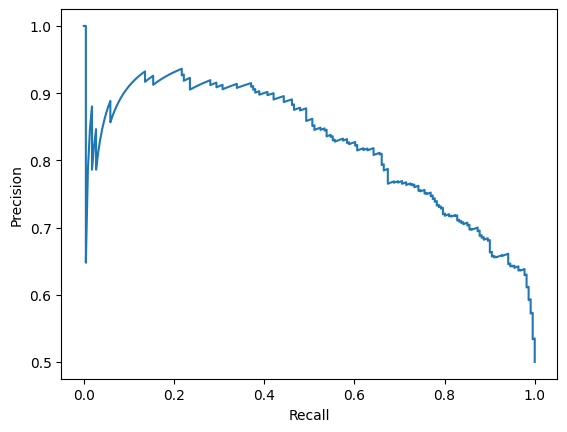

Model Accuracy 0.7470298464213271
FP rate [0.2941176470588231, 0.21182266009852244]
TR rate [0.7881773399014775, 0.7058823529411768]


In [26]:
print(model.summary)
import matplotlib.pyplot as plt
pr = model.summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print("Model Accuracy",model.summary.accuracy)
print("FP rate",model.summary.falsePositiveRateByLabel)
print("TR rate",model.summary.truePositiveRateByLabel)

In [27]:
pr = predict_test.toPandas()
TruePositive =0
FalsePositive=0
TrueNegative=0
FalseNegative=0
Postive=1.0
Negative=0.0
pos=0
Neg=0

print("Total",len(pr["Outcome"]))
for lbl in range(len(pr["Outcome"])):
  if  pr["prediction"][lbl]==Postive:
    pos+=1
    if pr["prediction"][lbl]==pr["Outcome"][lbl]:
      TruePositive+=1
    else:
      FalsePositive+=1
  if  pr["prediction"][lbl]==Negative:
    Neg+=1
    if pr["prediction"][lbl]==pr["Outcome"][lbl]:
      TrueNegative+=1
    else:
      FalseNegative+=1
#print("Total Positive & Negative predicted,  diabetes: ",pos,",Non Diabetes",Neg)
print("TruePostive",TruePositive,"FalsePostive",FalsePositive)
print("TrueNegative",TrueNegative,"FalseNegative",FalseNegative)

Total 141
TruePostive 36 FalsePostive 21
TrueNegative 73 FalseNegative 11


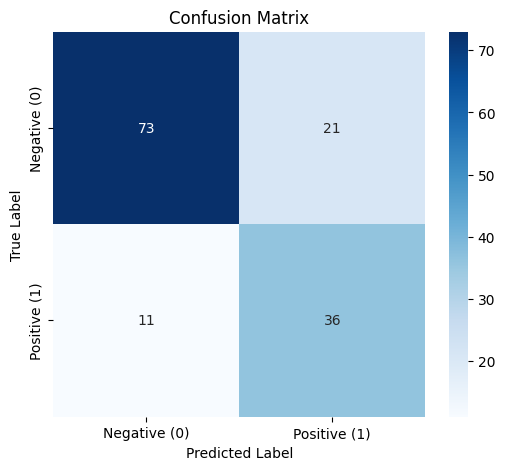

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

TN = TrueNegative
FP = FalsePositive
FN = FalseNegative
TP = TruePositive
conf_matrix = np.array([[TN, FP],
                        [FN, TP]])
labels = ["Negative (0)", "Positive (1)"]

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True,  cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [29]:
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1_score:.4f}")

Precision: 0.6316
Recall:    0.7660
F1-score:  0.6923
